In [1]:
import numpy as np

atoms = np.load("atoms.npy")
hoa = np.load("hoa.npy")

In [2]:
print(atoms.shape)
print(hoa.shape)

(5011, 48)
(5011,)


In [8]:
capacities_per_al_atoms = {}

for i in range(len(hoa)):
    number_of_al = np.sum(atoms[i])
    current_hoa = hoa[i]
    capacities_per_al_atoms.setdefault(number_of_al, [])
    capacities_per_al_atoms[number_of_al].append(current_hoa)

print(capacities_per_al_atoms)

{0.0: [20.7164], 1.0: [28.5713, 31.3843, 20.8693, 27.016, 29.3787, 31.8248, 20.8897, 26.8815, 28.7204, 31.6329, 20.8601, 27.0314, 29.5702, 31.4029, 20.8332, 27.2479, 29.1979, 31.639, 29.1238, 31.7347, 29.7357, 31.6856, 29.3678, 31.6193, 29.3446, 31.3564, 20.8637, 27.1311, 29.5446, 31.6758, 20.7219, 26.8888, 29.8037, 31.6134, 20.8946, 27.1201, 29.2553, 31.4398, 20.8042, 26.9396, 29.0139, 31.2313, 28.8889, 31.3083, 28.9021, 31.5559, 29.3949, 31.7884], 2.0: [32.9981, 23.3384, 30.2927, 34.0742, 29.1269, 33.1659, 30.4096, 34.4278, 28.4244, 29.3734, 32.2141, 29.2569, 28.3932, 31.4012, 29.0379, 29.4171, 32.1262, 28.9401, 33.3932, 32.2935, 31.0051, 29.0017, 34.1058, 32.2958, 31.4953, 30.3056, 34.4791, 27.7103, 32.5282, 31.1197, 30.4121, 31.4269, 27.4834, 26.9967, 31.0338, 33.8054, 31.523, 31.5845, 29.1592, 31.6899, 32.26, 32.2616, 28.5541, 31.5467, 33.9498, 29.9113, 32.0126, 30.4059, 31.7399, 32.0126, 30.5933, 31.6326, 32.8259, 33.2692, 30.1494, 32.2831, 31.9697, 28.2848, 32.2786, 28.7077, 28.

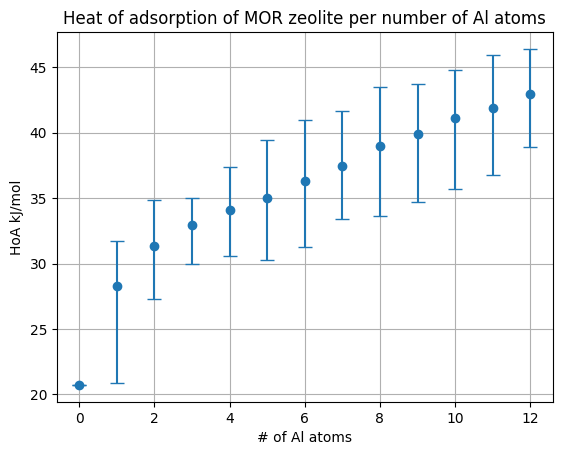

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Example dictionary with data
data_dict = capacities_per_al_atoms

# Extract data for plotting
labels = list(data_dict.keys())
means = [np.mean(data_dict[label]) for label in labels]
quartile_5 = [np.percentile(data_dict[label], 5) for label in labels]
quartile_95 = [np.percentile(data_dict[label], 95) for label in labels]

# Convert lists to arrays
means = np.array(means)
quartile_5 = np.array(quartile_5)
quartile_95 = np.array(quartile_95)

# Calculate error bars
yerr_lower = means - quartile_5
yerr_upper = quartile_95 - means

# Plotting
plt.errorbar(labels, means, yerr=[yerr_lower, yerr_upper], fmt='o', capsize=5)
plt.xlabel('Number of Al atoms')
plt.ylabel('HoA kJ/mol')
plt.title('Heat of adsorption of MOR zeolite per number of Al atoms')
plt.grid(True)
# Save the plot as a PNG image
plt.savefig('errorbar_MOR_HOA.png')
plt.show()